# Building a Test Harness for ML Algorithms
* Logistic Regression
* Linear Discrimnant Analysis
* k-nearest Neighbors
* CART
* Naive Bayes
* Support Vector Machines

It's important to identify which algorithm is the best one for the problem you are trying to solve. This notebook helps us build a "test harness" to determining which has the best accuracy. 

In [1]:
# Load data file
import pandas as pd
import numpy as np

# Data source:
# http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
'''
   1. Sample code number
   2. Clump Thickness
   3. Uniformity of Cell Size
   4. Uniformity of Cell Shape
   5. Marginal Adhesion
   6. Single Epithelial Cell Size
   7. Bare Nuclei
   8. Bland Chromatin
   9. Normal Nucleoli
  10. Mitoses
  11. Class (2 for benign, 4 for malignant)
  '''

file = "WI_breast_cancer.csv"

names = ['SampleID', 'Clmp_thick', 'Uni_cell_sz', 'Uni_cell_shp', 'Marg_Adhes', 'Epi_cell_sz', 
        'Bar_nuc', 'Bland_Crom', 'Norm_nuc', 'Mitosis', 'Class']

# The data have "?" in place of NA, so we convert those to na on read
data = pd.read_csv(file, header=None, names=names, sep=',', na_values=["?"])
# and now we drop them -- NOTE: this is 16 patients out of 699
data = data.dropna() 

X = data.iloc[:, 0:10]   # load features into X DF
Y = data.iloc[:, 10]     # Load target into Y DF

# Add with viewing the data
pd.set_option('display.width', 100)
data.describe()
#data.info()
#data.head()

,SampleID,Clmp_thick,Uni_cell_sz,Uni_cell_shp,Marg_Adhes,Epi_cell_sz,Bar_nuc,Bland_Crom,Norm_nuc,Mitosis,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [2]:
# Includes
''' kFold: Each fold is then used once as a validation while the k - 1 remaining folds 
    form the training set - prevents the test set from *leaking* into the training 
    set and overfitting - kfold and cross validation are a 'best practise for ML'
'''
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

''' The next section are importing the different types of models we are trying to evaluate 
    against one another from sklearn
'''
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Create a list of the models to test. 
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))

In [4]:
# Create a list of models and their results
results = [] 
names = [] 
scoring = 'accuracy'

# evaluate each model in turn cycling through all the algorithms in the list 'models'
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.650426 (0.131499)
LDA: 0.959165 (0.051041)
KNN: 0.572528 (0.065770)
CART: 0.937084 (0.036407)
NB: 0.844501 (0.106581)
SVM: 0.656266 (0.123966)


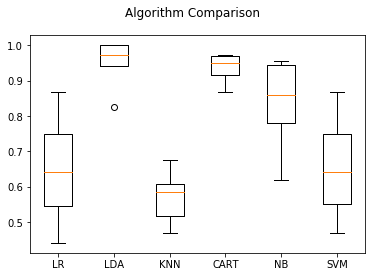

In [5]:
%matplotlib inline
from matplotlib import pyplot

# boxplot algorithm comparison 
c = "purple"
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111)
pyplot.boxplot(results) 
ax.set_xticklabels(names) 

pyplot.show()

Looks like LDA and classification trees, possibly naive Bayes, are good ones to continue testing with this dataset. 

NOTE: This will vary *significantly* across datasets